In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# custom regression model
from myLR import LinearRegression

In [2]:
# simple split data function
def split_data(data):
    """
    Shuffle the data, keep first 80% as train and last 20% as test
    """
    data = data.sample(frac = 1).reset_index(drop = True)
    train = int(data.shape[0]*0.8)

    return data.iloc[:train], data.iloc[train:]

# simple make X, y
def make_xy(data):
    return data.drop(['quality'], axis = 1).values, data['quality'].values

def RMSE(y_true, y_preds):
    return np.sqrt(sum((y_true - y_preds)**2) / len(y_true))

For this test, I will be using the [Red Wine Quality Dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv) from Kaggle. The only preprocessing we will attempt is removing rows with NA.

In [3]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print('Shape before drop: {}'.format(data.shape))
data.dropna(axis = 0, inplace = True)
print('Shape after drop: {}'.format(data.shape))

Shape before drop: (1599, 12)
Shape after drop: (1599, 12)


Looks like there was no missing data. So now we move onto the regression.

In [5]:
# create an instance
LR = LinearRegression()
# separate train and test
train, test = split_data(data)
X_train, y_train = make_xy(train)
X_test, y_test = make_xy(test)

In [6]:
# fit
LR.fit(X_train, y_train)

# predict
LR.predict(X_test)

Plot the predictions and actual values

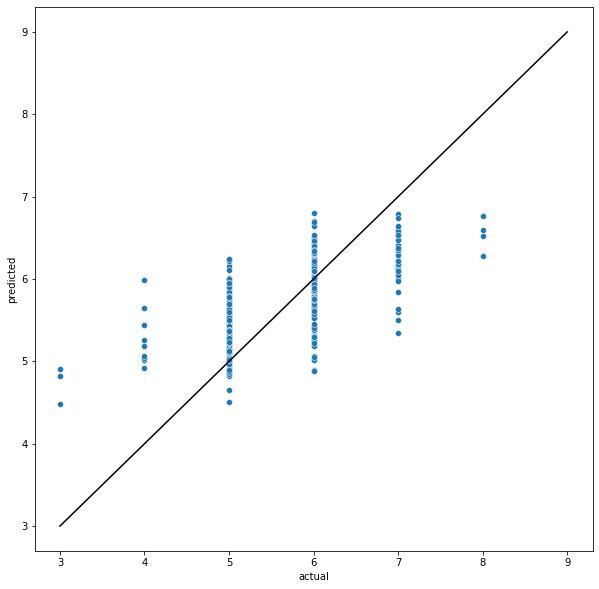

In [10]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,10)

y_df = pd.DataFrame(zip(y_test, LR.y_test_hat), columns = ['actual', 'predicted'])
g = sns.scatterplot(data = y_df, x = 'actual', y = 'predicted')
plt.plot([3,9], [3,9], 'k-')
plt.show()

Let's see what the root mean squared error is

In [8]:
print(RMSE(y_test, LR.y_test_hat))

0.6291122477283165


In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Given that the quality range is from 3 to 8, a RMSE of 0.65 means that the regression model is off on average by 0.65 quality points. The purpose of this notebook is not to minimize the RMSE, but to construct and implement a simple linear regression model, which we did successfully.